In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# store map size (pixels)
STORE_SIZE = [3136, 2475] 

TRANSFORMED_DATA_PATH = "C:/Users/diogo/Desktop/Tese/Resultados/transformed_coords.csv"
TRANSFORMED_DATA_SELECT_CAMS_PATH = "C:/Users/diogo/Desktop/Tese/Resultados/transformed_coords_selected_cameras.csv"
MAP_PATH = "C:/Users/diogo/Desktop/Tese/Dados/floorplan.png"
COLOR_PER_CAMERA = {"1.03": "Greys", "1.04": "Greens", "1.05": "Oranges", "2.05": "Blues", "2.11": "RdPu"}



In [3]:
df = pd.read_csv(TRANSFORMED_DATA_PATH)
df.head()

,Unnamed: 0.1,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,xmin_track,...,ymax_real,frame_idx,Customer_id,time,x_frame,y_frame,x_floorplan,y_floorplan,camera,new_customer_id
0,0,0,173.322418,298.714783,258.738098,476.472382,0.490883,0.0,person,173.0,...,476.472382,1681,31.0,09:30:13,216.0,476.0,1106.655414,1445.109068,1.03,0.0
1,1,0,172.177002,296.251678,264.606384,472.565857,0.495701,0.0,person,175.0,...,472.565857,1685,31.0,09:30:13,218.0,472.0,1107.430961,1446.409055,1.03,0.0
2,2,0,168.392349,296.885681,283.628845,471.694275,0.495246,0.0,person,181.0,...,471.694275,1689,31.0,09:30:14,226.0,471.0,1109.115317,1445.465900,1.03,0.0
3,3,0,171.054672,301.844727,288.229431,473.483582,0.668843,0.0,person,186.0,...,473.483582,1694,31.0,09:30:15,229.0,473.0,1109.511951,1444.142931,1.03,0.0
4,4,0,175.154572,295.096436,289.564270,471.141724,0.694716,0.0,person,188.0,...,471.141724,1698,31.0,09:30:16,232.0,471.0,1110.303644,1444.451963,1.03,0.0


In [4]:
def get_data_by_customer(df, customer_id):
    return df.loc[df["new_customer_id"] == customer_id]

def get_data_by_customer_and_camera(df, customer_id, camera):
    return df.loc[df["new_customer_id"] == customer_id].loc[df["camera"] == camera]

def get_data_by_time(df, begin_time, end_time):
    return df.loc[(df["time"] > begin_time) & (df["time"] < end_time)]

def count_different_customers(df):
    return df.new_customer_id.unique().size

def get_time_interval(df):
    min_time = df["time"].min()
    max_time = df["time"].max()
    return (min_time, max_time)

def get_color(camera, i, length):
    palette = sns.color_palette(COLOR_PER_CAMERA[camera], 3)
    if i < (length / 3):
        return palette[0]
    elif i < ((2*length) / 3):
        return palette[1]
    else:
        return palette[2]

def print_trajectory_chronologically(df):
    img = plt.imread(MAP_PATH)
    fig, ax = plt.subplots()
    fig.set_dpi(1200)
    ax.imshow(img, extent=[0, STORE_SIZE[0], 0, STORE_SIZE[1]])

    pd.to_datetime(df["time"], format="%H:%M:%S")
    df_chrono = df.sort_values(["time"])

    for camera in df_chrono["camera"].unique():
        camera_list = df_chrono.loc[df_chrono.camera == camera].values.tolist()
        for i in range(len(camera_list)):
            proj_color = get_color(str(camera), i, len(camera_list))
            print(str(camera_list[i][17]) + " " + str(camera_list[i][19]) + " cor: " + str(proj_color) + " camera: " + str(camera_list[i][24]))
            plt.scatter(camera_list[i][22], camera_list[i][23], marker=".", s=1, lw=0, color=proj_color)
        
    plt.show()

def print_trajectory_by_client(df):
    img = plt.imread(MAP_PATH)
    fig, ax = plt.subplots()
    fig.set_dpi(1200)
    ax.imshow(img, extent=[0, STORE_SIZE[0], 0, STORE_SIZE[1]])

    counter = 0
    color_palette = sns.color_palette("Paired", len(df["new_customer_id"].unique()))
    for customer in df["new_customer_id"].unique():
        plt.scatter(df.loc[df.Customer_id == customer, "x_floorplan"], df.loc[df.Customer_id == customer, "y_floorplan"], marker=".", s=1, lw=0, color=color_palette[counter])
        counter+=1
        
    plt.show()

### Exemplo 1
Nos vídeos, no tempo determinado (15h24 às 15h26) não existe nenhum cliente na area das camaras 1.03, 1.04 e 1.05.
No entanto, existem projeções com esse tempo.
Desta forma conseguimos perceber desde logo que o tempo está errado.

15
168 15:24:01 cor: (0.8501191849288735, 0.8501191849288735, 0.8501191849288735) camera: 1.03
172 15:24:01 cor: (0.8501191849288735, 0.8501191849288735, 0.8501191849288735) camera: 1.03
177 15:24:02 cor: (0.8501191849288735, 0.8501191849288735, 0.8501191849288735) camera: 1.03
181 15:24:03 cor: (0.8501191849288735, 0.8501191849288735, 0.8501191849288735) camera: 1.03
185 15:24:03 cor: (0.8501191849288735, 0.8501191849288735, 0.8501191849288735) camera: 1.03
189 15:24:04 cor: (0.8501191849288735, 0.8501191849288735, 0.8501191849288735) camera: 1.03
193 15:24:05 cor: (0.8501191849288735, 0.8501191849288735, 0.8501191849288735) camera: 1.03
197 15:24:05 cor: (0.586082276047674, 0.586082276047674, 0.586082276047674) camera: 1.03
202 15:24:06 cor: (0.586082276047674, 0.586082276047674, 0.586082276047674) camera: 1.03
206 15:24:07 cor: (0.586082276047674, 0.586082276047674, 0.586082276047674) camera: 1.03
214 15:24:08 cor: (0.586082276047674, 0.586082276047674, 0.586082276047674) camera: 1.

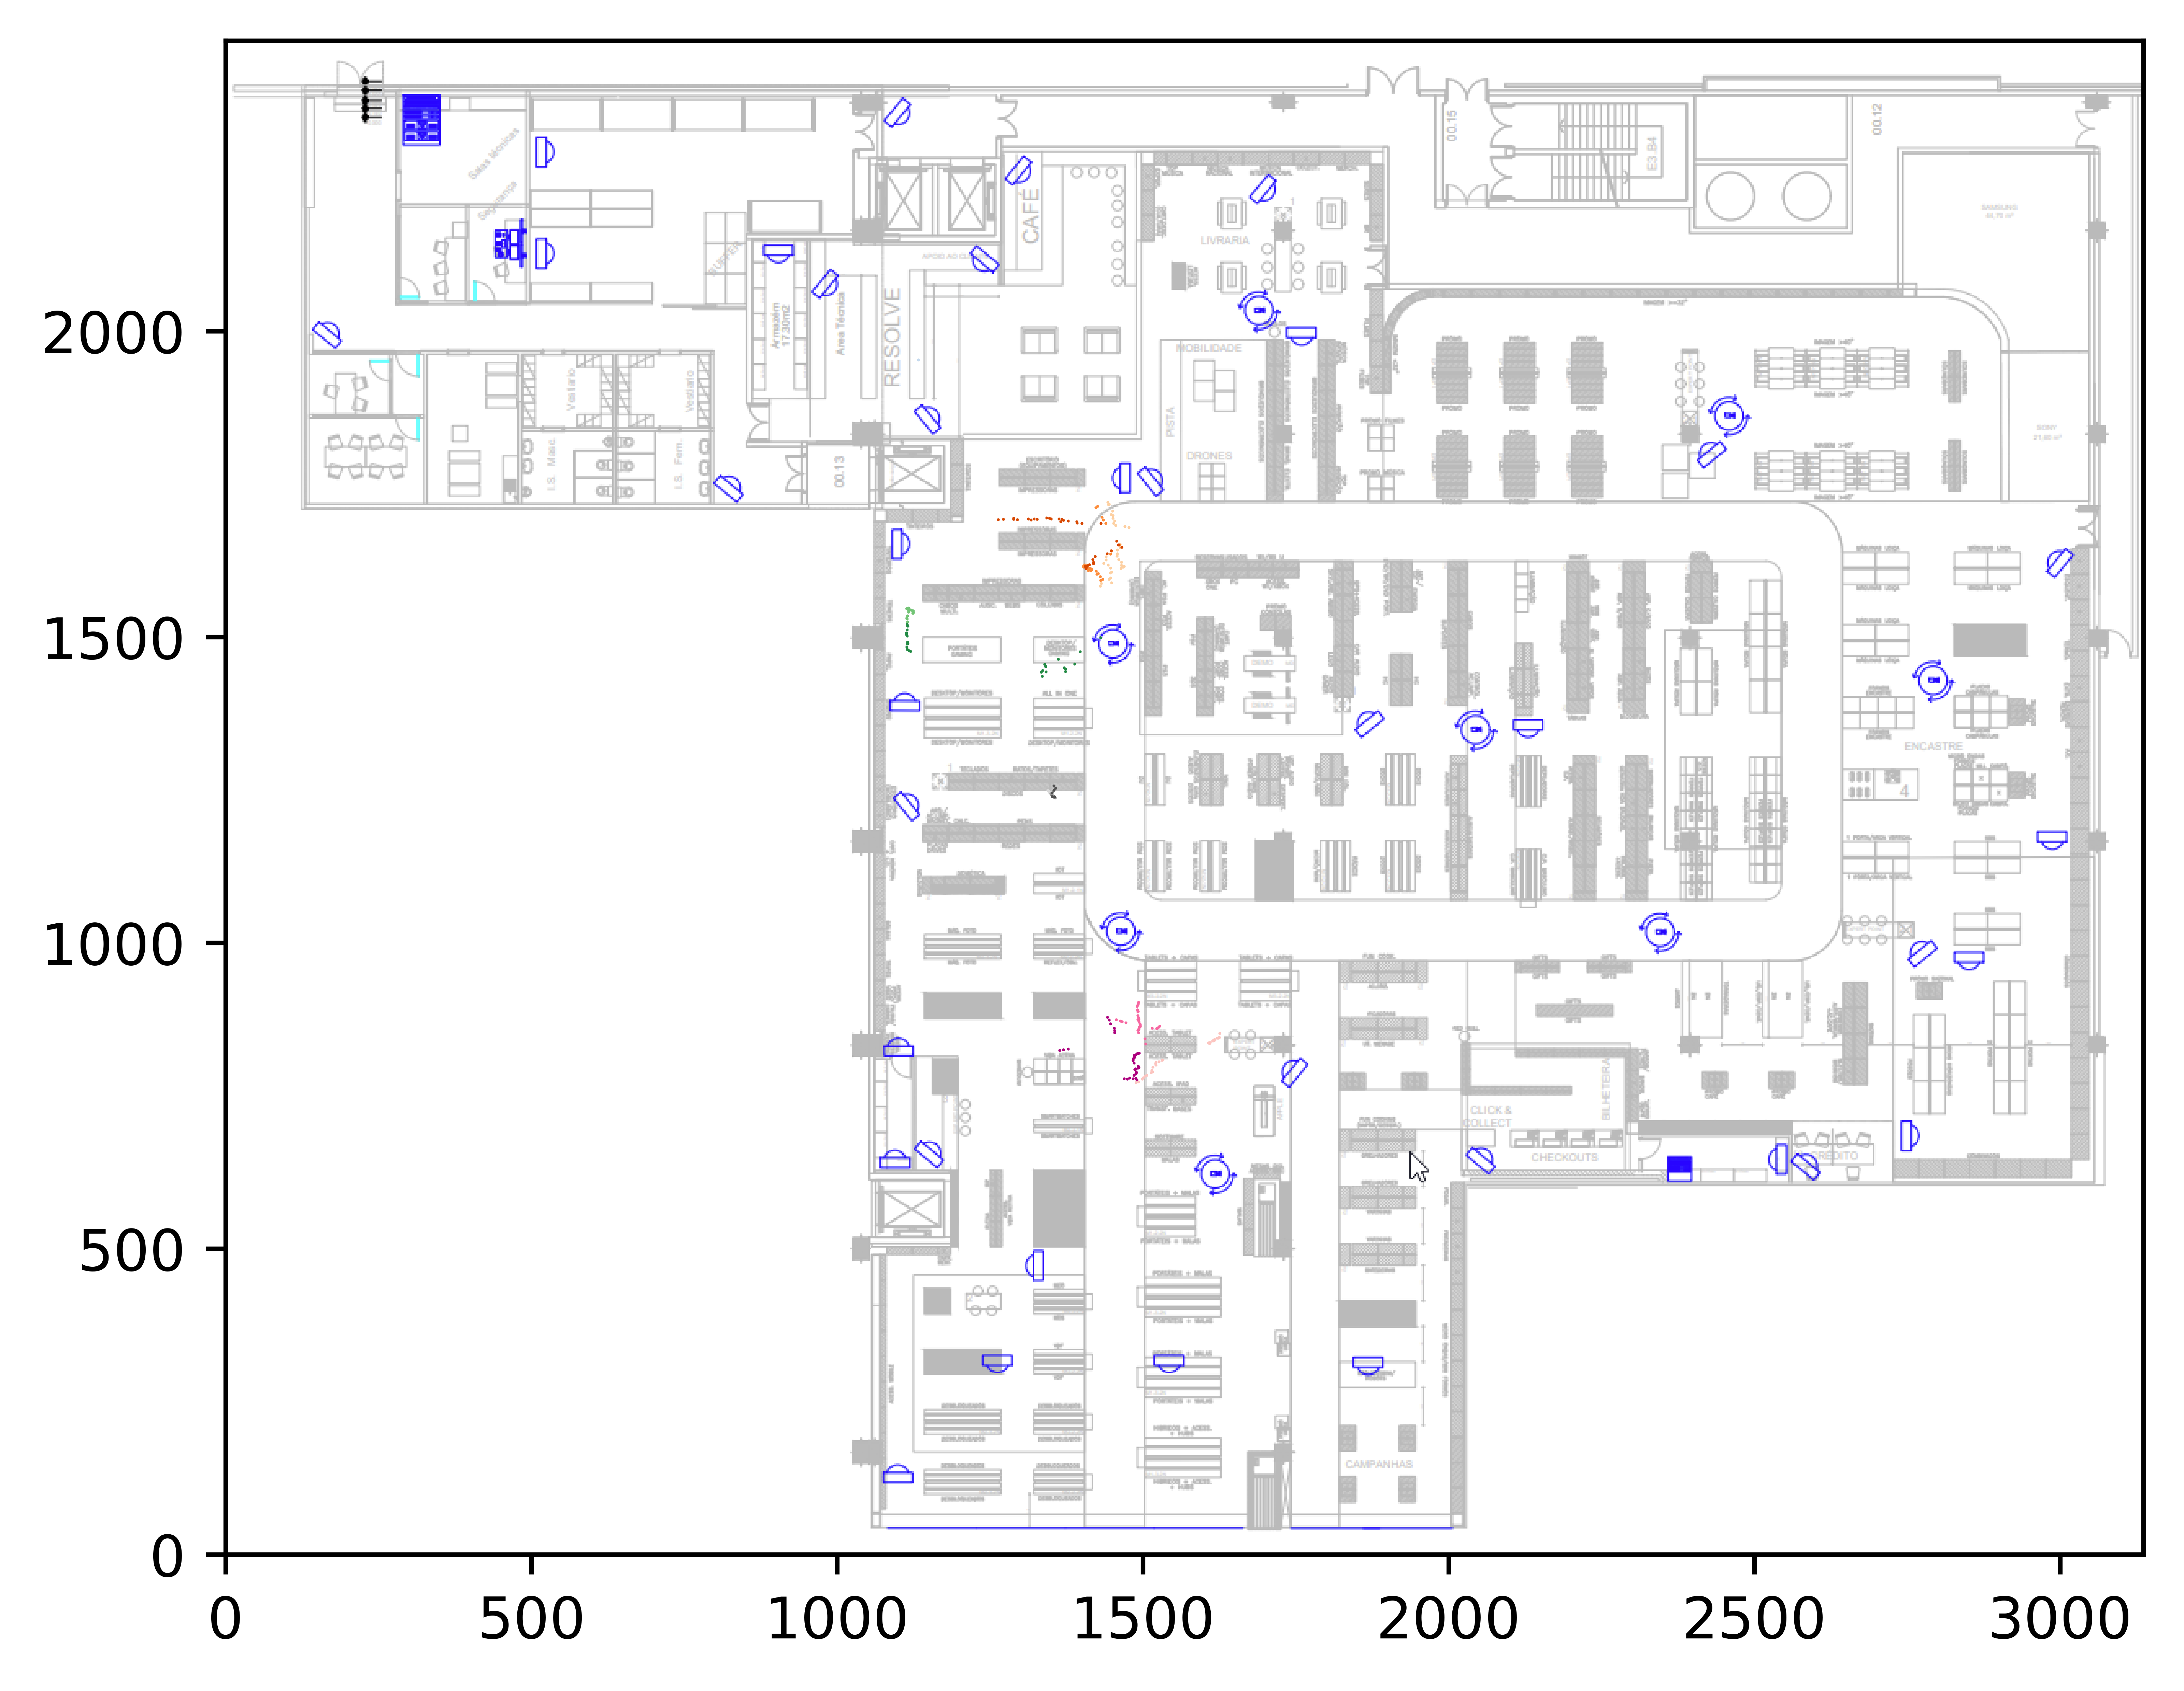

In [5]:
data_by_time = get_data_by_time(df, "15:24:00", "15:26:00")
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)

### Exemplo 2

Para ver quando acaba a gravação da camara

Mais escuro -> mais recente<br>
Mais esboçado  -> mais antigo

40
1989 23:30:01 cor: (0.7752402921953095, 0.8583006535947711, 0.9368242983467897) camera: 2.05
1268 23:30:01 cor: (0.7752402921953095, 0.8583006535947711, 0.9368242983467897) camera: 2.05
1273 23:30:02 cor: (0.7752402921953095, 0.8583006535947711, 0.9368242983467897) camera: 2.05
1994 23:30:02 cor: (0.7752402921953095, 0.8583006535947711, 0.9368242983467897) camera: 2.05
1277 23:30:02 cor: (0.7752402921953095, 0.8583006535947711, 0.9368242983467897) camera: 2.05
1281 23:30:03 cor: (0.7752402921953095, 0.8583006535947711, 0.9368242983467897) camera: 2.05
1285 23:30:04 cor: (0.7752402921953095, 0.8583006535947711, 0.9368242983467897) camera: 2.05
2019 23:30:06 cor: (0.7752402921953095, 0.8583006535947711, 0.9368242983467897) camera: 2.05
1298 23:30:06 cor: (0.7752402921953095, 0.8583006535947711, 0.9368242983467897) camera: 2.05
1302 23:30:07 cor: (0.7752402921953095, 0.8583006535947711, 0.9368242983467897) camera: 2.05
1310 23:30:08 cor: (0.7752402921953095, 0.8583006535947711, 0.93682

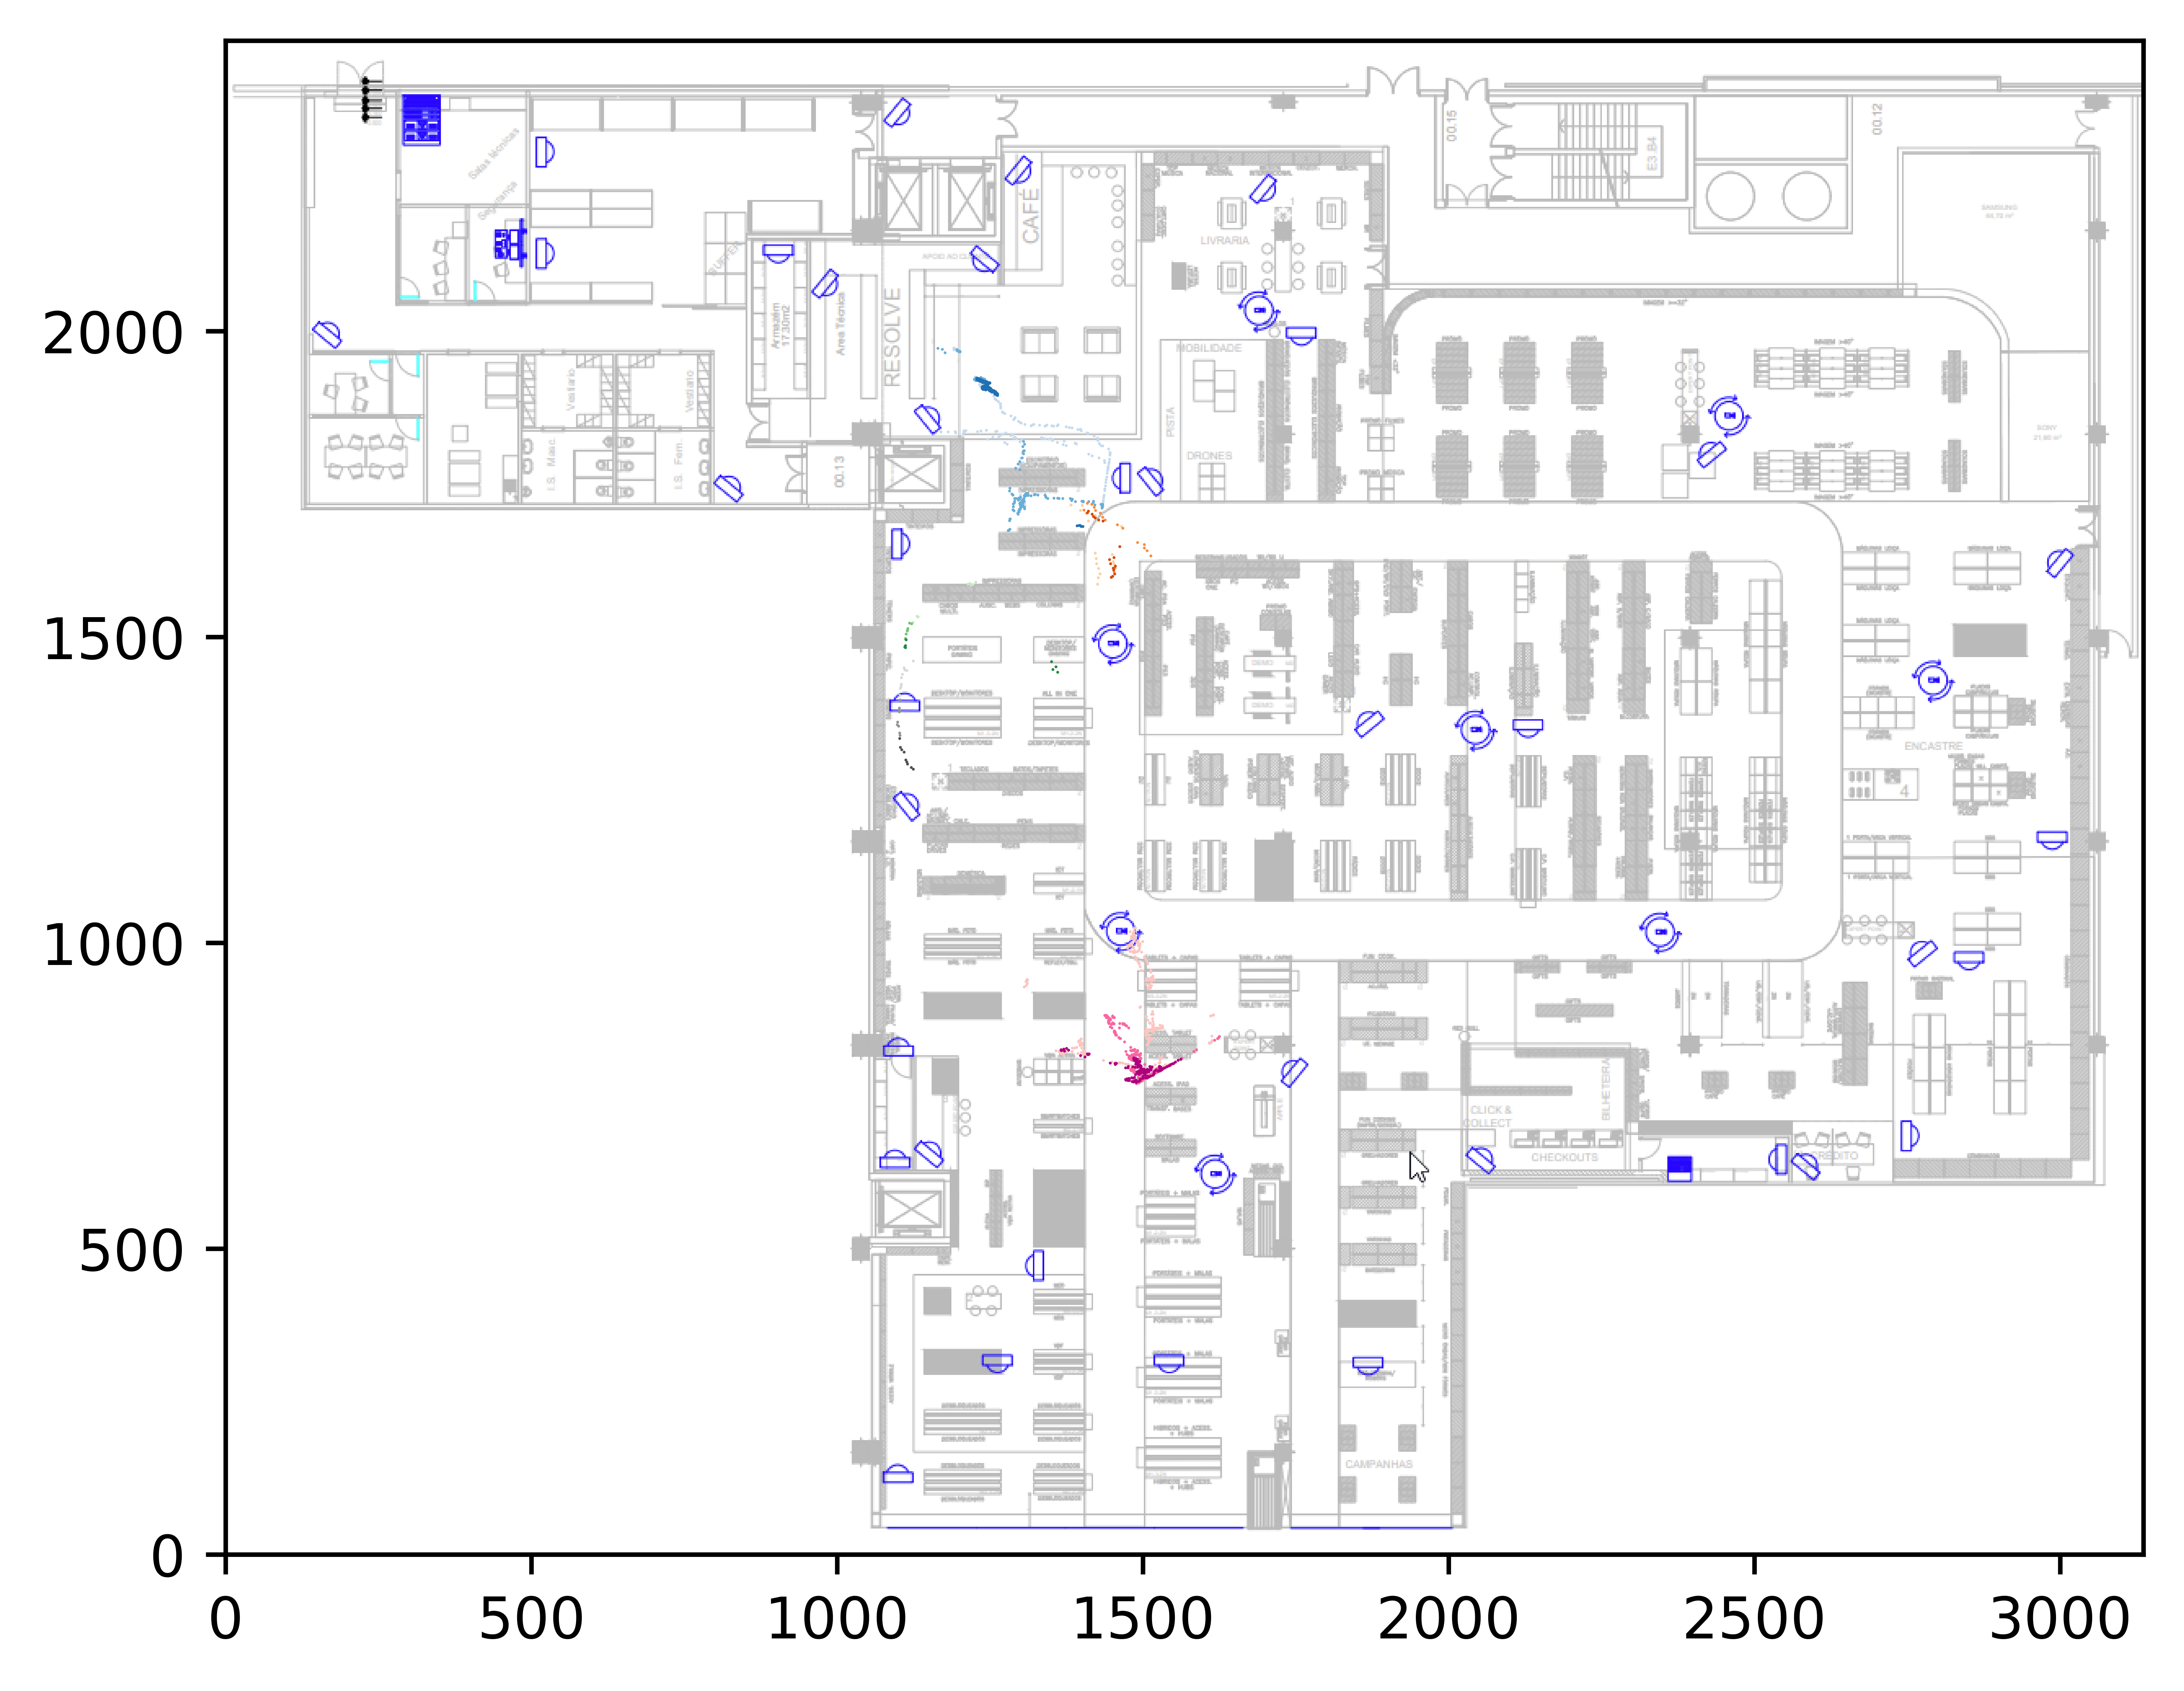

In [6]:
data_by_time = get_data_by_time(df, "23:30:00", "23:59:59")
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)

### Exemplo 3

09:30:14 é a hora que aparece o primeiro ponto da trajetória da camara 1.03

mesmo assim, não corresponde ao momento do vídeo em que aparece a primeira pessoa porque a trajetória vai de cima para baixo.

11
1568 09:28:22 cor: (0.7792233756247597, 0.9132333717800846, 0.7518031526336024) camera: 1.04
1573 09:28:23 cor: (0.7792233756247597, 0.9132333717800846, 0.7518031526336024) camera: 1.04
1577 09:28:23 cor: (0.7792233756247597, 0.9132333717800846, 0.7518031526336024) camera: 1.04
1581 09:28:24 cor: (0.7792233756247597, 0.9132333717800846, 0.7518031526336024) camera: 1.04
1589 09:28:25 cor: (0.7792233756247597, 0.9132333717800846, 0.7518031526336024) camera: 1.04
1585 09:28:25 cor: (0.7792233756247597, 0.9132333717800846, 0.7518031526336024) camera: 1.04
1593 09:28:26 cor: (0.7792233756247597, 0.9132333717800846, 0.7518031526336024) camera: 1.04
1598 09:28:27 cor: (0.7792233756247597, 0.9132333717800846, 0.7518031526336024) camera: 1.04
1602 09:28:28 cor: (0.7792233756247597, 0.9132333717800846, 0.7518031526336024) camera: 1.04
1606 09:28:28 cor: (0.7792233756247597, 0.9132333717800846, 0.7518031526336024) camera: 1.04
1610 09:28:29 cor: (0.7792233756247597, 0.9132333717800846, 0.75180

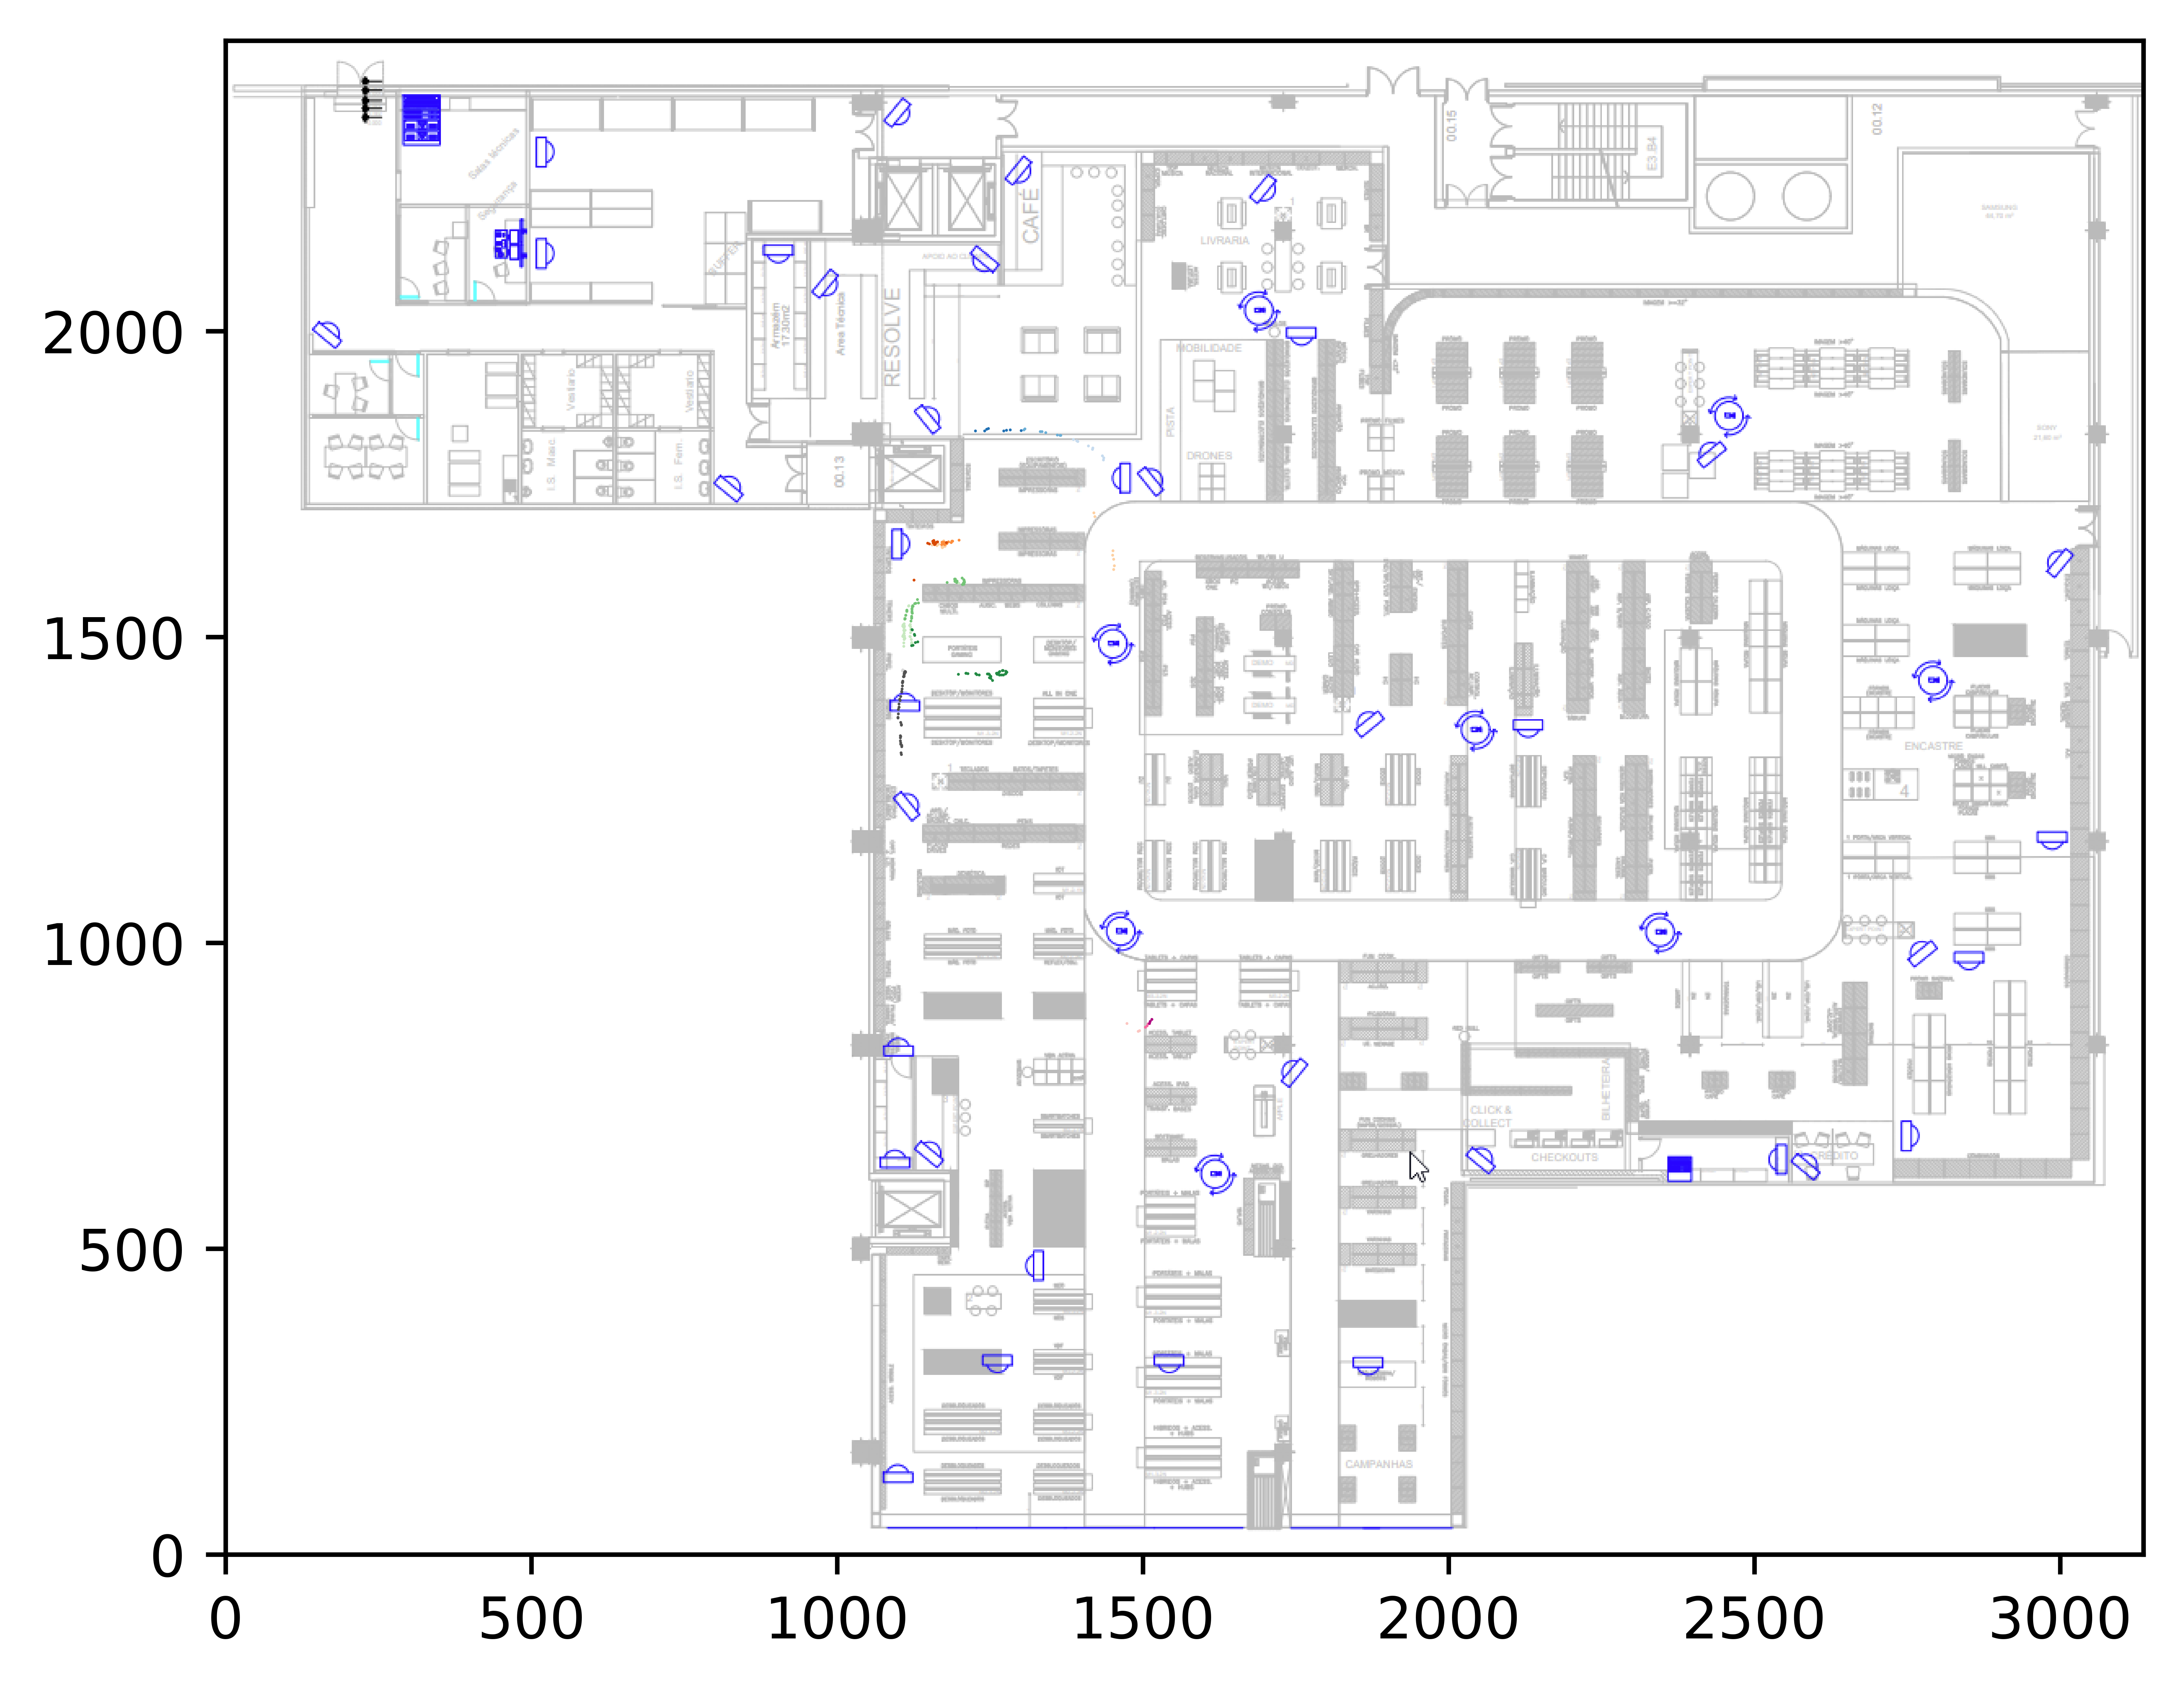

In [7]:
data_by_time = get_data_by_time(df, "09:28:00", "09:32:10")
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)